# Pertanyaan Bisnis
1. Bagaimana tren pengguna bike-sharing dalam 2 tahun terkahir?
2. Berapa banyak pelanggan berdasarkan tipe (casual/registered)?
3. Musim apakah yang ramai?
4. Bagaimanakah persentase banyak nya pelanggan hari biasa dengan liburan?
5. Bagaimana pengaruh/korelasi mengenai cuaca terhadap jumlah pengguna?


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [44]:
# import dataset from Google Drive
df = pd.read_csv("dataset/hour.csv")

In [45]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [47]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [48]:
df.duplicated().sum()

0

- Tidak ada kolom dengan value null
- Tidak ada duplikat row


Note kolom
1. dteday -> konversi ke datetime

In [49]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['mnth'] = df['dteday'].dt.month_name()
df['weekday'] = df['dteday'].dt.day_name()
df['yr'] = df['dteday'].dt.year

In [50]:
df['temp'] = df['temp'] * 41
df['atemp'] = df['atemp'] * 50
df['hum'] = df['hum'] * 100
df['windspeed'] = df['windspeed'] * 67

In [51]:
mapping_season = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

df['season'] = df['season'].map(mapping_season)

In [52]:
df.describe()

,instant,dteday,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,11.546752,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,6.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,12.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,18.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


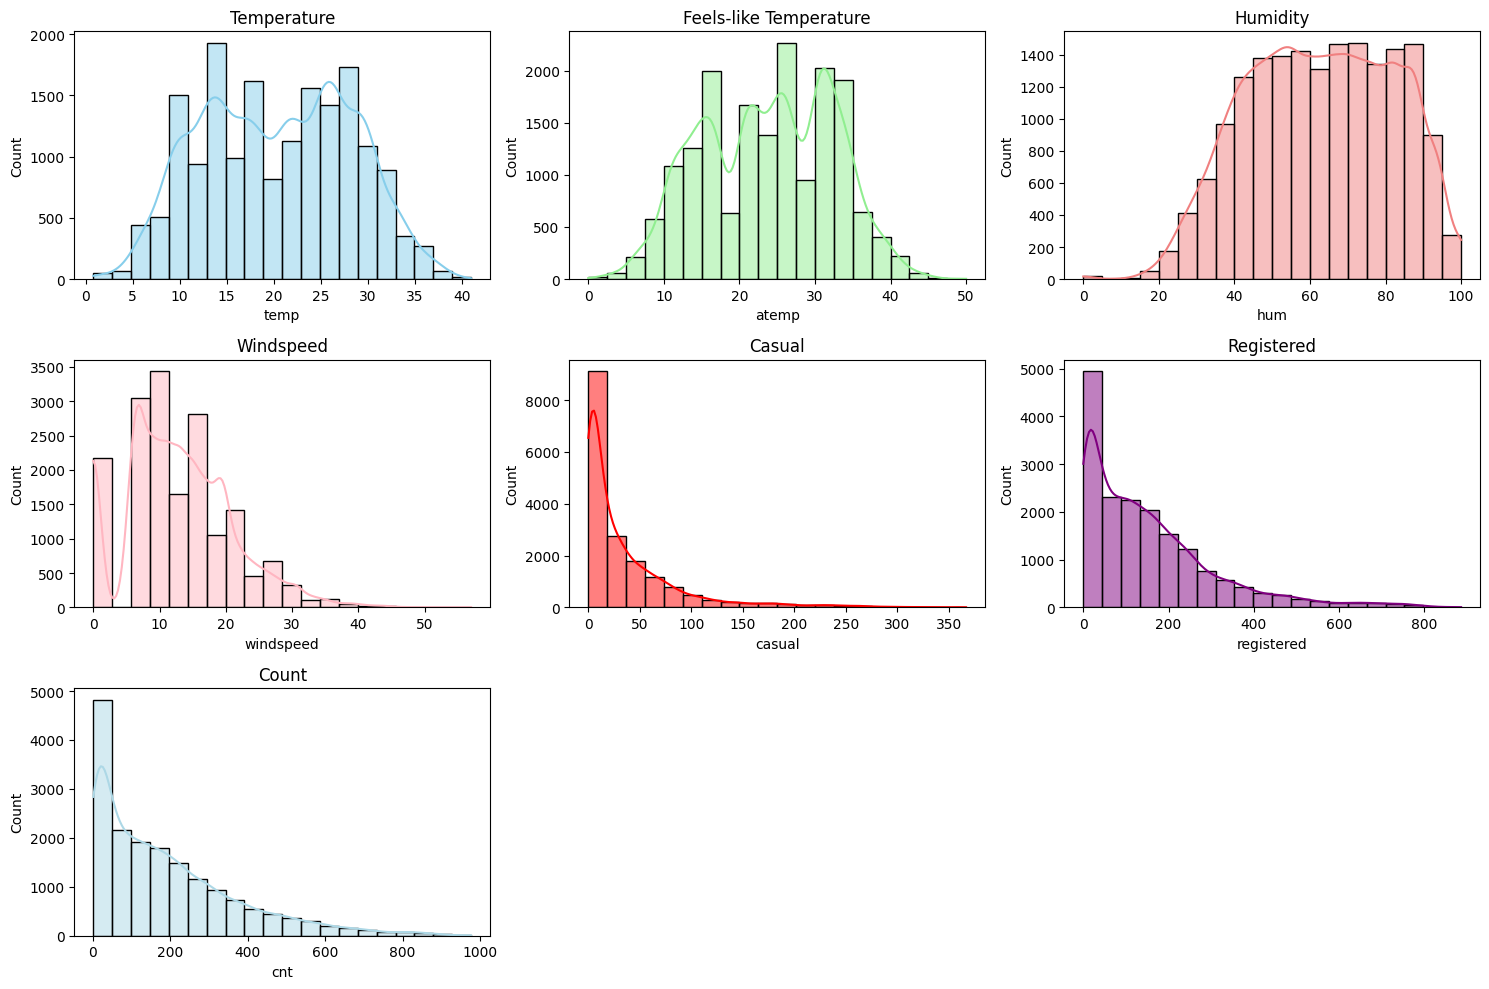

In [53]:
# Membuat histogram menggunakan sns.histplot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

sns.histplot(data=df, x='temp',kde=True, bins=20,edgecolor='black', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Temperature')

sns.histplot(data=df, x='atemp',kde=True, bins=20,edgecolor='black', color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Feels-like Temperature')

sns.histplot(data=df, x='hum',kde=True, bins=20,edgecolor='black', color='lightcoral', ax=axes[0, 2])
axes[0, 2].set_title('Humidity')

sns.histplot(data=df, x='windspeed',kde=True, bins=20,edgecolor='black', color='lightpink', ax=axes[1, 0])
axes[1, 0].set_title('Windspeed')

sns.histplot(data=df, x='casual',kde=True, bins=20,edgecolor='black', color='red', ax=axes[1, 1])
axes[1, 1].set_title('Casual')

sns.histplot(data=df, x='registered',kde=True, bins=20,edgecolor='black', color='purple', ax=axes[1, 2])
axes[1, 2].set_title('Registered')

sns.histplot(data=df, x='cnt',kde=True, bins=20,edgecolor='black', color='lightblue', ax=axes[2, 0])
axes[2, 0].set_title('Count')

# Menyembunyikan subplot yang tidak terpakai
axes[2, 1].axis('off')
axes[2, 2].axis('off')

# Menampilkan plot
plt.tight_layout()
plt.show()

Distribusi tidak normal pada Windspeed, Casual, Registered, dan Count

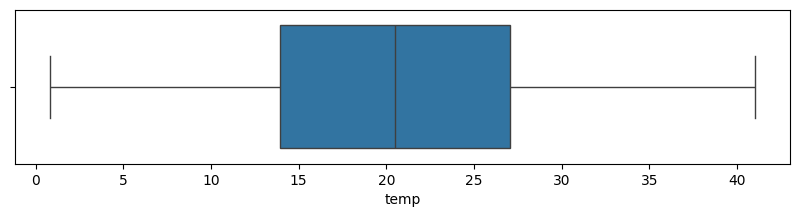

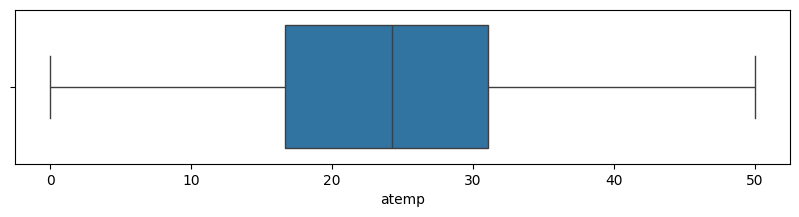

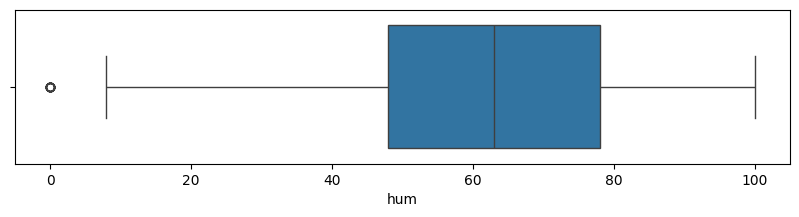

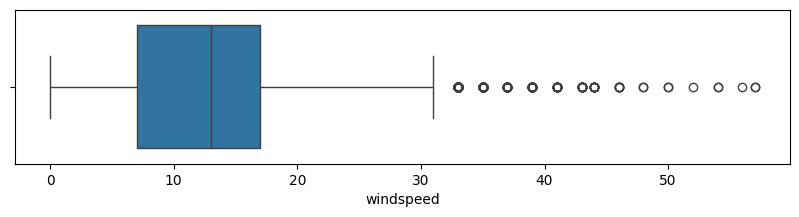

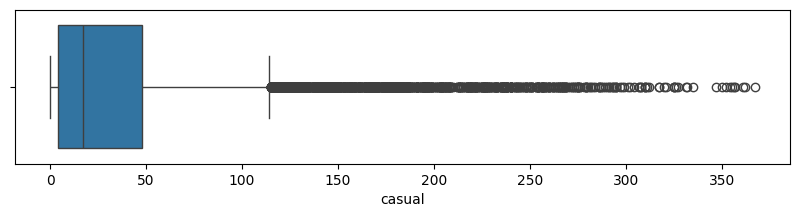

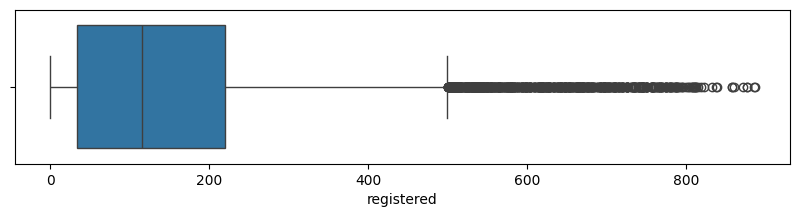

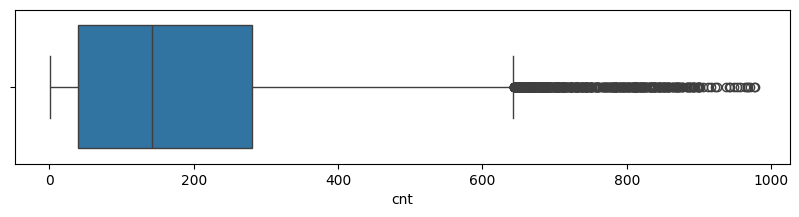

In [54]:
# Outliers
columns = ['temp',	'atemp',	'hum',	'windspeed',	'casual',	'registered',	'cnt']
for column in columns:
        plt.figure(figsize=(10,2))
        sns.boxplot(data=df, x=column)

Outlier pada Windspeed, Casual, Registered, dan Count

# Tren Penyewaan Sepeda

In [55]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [56]:
data1 = df[['dteday', 'casual', 'registered', 'cnt']]

In [57]:
data1

,dteday,casual,registered,cnt
0,2011-01-01,3,13,16
1,2011-01-01,8,32,40
2,2011-01-01,5,27,32
3,2011-01-01,3,10,13
4,2011-01-01,0,1,1
...,...,...,...,...
17374,2012-12-31,11,108,119
17375,2012-12-31,8,81,89
17376,2012-12-31,7,83,90
17377,2012-12-31,13,48,61


In [58]:
# Mengubah kolom 'dteday' menjadi format tahun-bulan
data1['dteday'] = pd.to_datetime(data1['dteday']).dt.to_period('M')
data1['dteday'] = data1['dteday'].astype('str')

# Menghitung total bulanan untuk kolom 'cnt'
data1 = data1.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

<ipython-input-58-4733e8a1ae85>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-4733e8a1ae85>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
data1.head(10)

,dteday,casual,registered,cnt
0,2011-01,3073,35116,38189
1,2011-02,6242,41973,48215
2,2011-03,12826,51219,64045
3,2011-04,22346,72524,94870
4,2011-05,31050,104771,135821
5,2011-06,30612,112900,143512
6,2011-07,36452,104889,141341
7,2011-08,28842,107849,136691
8,2011-09,26545,100873,127418
9,2011-10,25222,98289,123511


In [60]:
import plotly.express as px

# Membuat satu kesatuan chart dengan Plotly Express
fig = px.bar(data1,
             x='dteday',
             y=['casual', 'registered'],
             labels={'value': 'Count'},
             color_discrete_sequence=["blue", "green"],
             title='Monthly Number of Casual and Registered Users (2 years)',
             template='plotly_white',
             barmode='group')

# Menambahkan line plot untuk 'cnt'
fig.add_scatter(x=data1['dteday'], y=data1['cnt'], mode='lines+markers', name='Cnt', line=dict(color='red'))

# Menambahkan judul
fig.update_layout(title_text='Monthly Number of Casual, Registered, and Both (2 years)')

# Menampilkan plot
fig.show()

* Berdasarkan interpretasi visual bahwa pelanggan bike-sharing mengalami peningkatan.
* Tetapi dengan peningkatan tersebut terdapat catatan bahwa di tengah tahun mengalami penurunan pelanggan dan mengalami kenaikan lagi pada awal tahun.

# 2. Banyaknya Penyewa

## Registered dan Casual

In [61]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


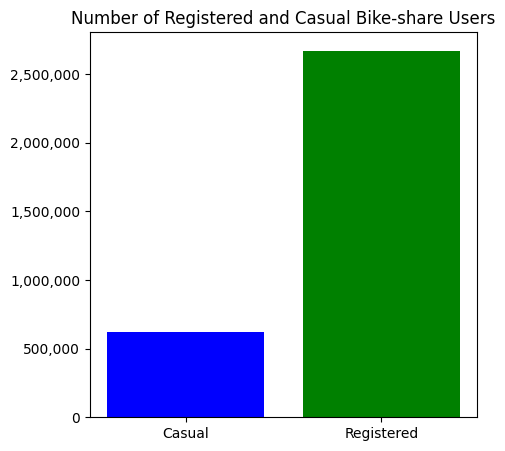

In [62]:
from matplotlib.ticker import FuncFormatter
def format_ticks(value, _):
    return f"{int(value):,}"
plt.figure(figsize=(5,5))
plt.bar(['Casual', 'Registered'], [df['casual'].sum(), df['registered'].sum()], color=['blue','green'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.title("Number of Registered and Casual Bike-share Users")
plt.show()

## Berdasarkan Season

In [63]:
season = df.groupby('season').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).reset_index()

In [64]:
season

,season,casual,registered,cnt
0,Fall,226091,835038,1061129
1,Springer,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


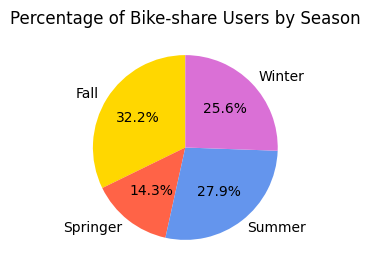

In [65]:
plt.figure(figsize=(3, 3))
plt.pie(season['cnt'], labels=season['season'], autopct='%1.1f%%', startangle=90, colors=['gold', 'tomato', 'cornflowerblue', 'orchid'])
plt.title('Percentage of Bike-share Users by Season')
plt.show()

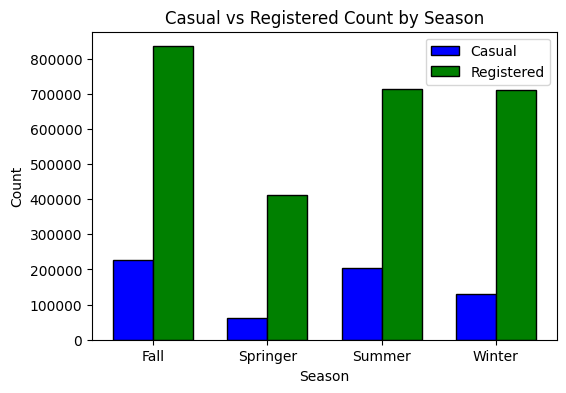

In [66]:
# Membuat barchart
plt.figure(figsize=(6, 4))
bar_width = 0.35
bar_positions = range(len(season))

plt.bar(bar_positions, season['casual'], width=bar_width, label='Casual', color='blue', edgecolor='black')
plt.bar([pos + bar_width for pos in bar_positions], season['registered'], width=bar_width, label='Registered', color='green', edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Casual vs Registered Count by Season')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], season['season'])

# Menambahkan legend
plt.legend()

# Menampilkan plot
plt.show()

Bike-sharing paling banyak diminati pada Fall Season, untuk tipe pelanggan yang registered maupun casual.

## Berdasarkan Weathersit

In [67]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [68]:
weathersit = df.groupby('weathersit').agg({
    'cnt':'sum'
}).reset_index()
weathersit['weathersit'] = weathersit['weathersit'].astype(str)

In [69]:
weathersit

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


In [70]:
weather_descriptions = {
    "1": "Clear, Few clouds, Partly cloudy, Partly cloudy",
    "2": "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    "3": "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    "4": "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}
weathersit['weathersit_legend'] = weathersit['weathersit'].map(weather_descriptions)
fig = px.bar(weathersit, x='weathersit', y='cnt',
             color='weathersit_legend',
             labels={'cnt': 'Count'},
             title='Weather Situation Count',
             text='cnt')

# Show the plot
fig.show()

In [71]:
fig = px.bar(weathersit, x="weathersit", y="cnt", color="weathersit")

# Tambahkan judul dan label pada sumbu
fig.update_layout(
    title="Weather Situation Count",
    xaxis_title="Weather Situation",
    yaxis_title="Count"
)

# Tampilkan plot
fig.show()

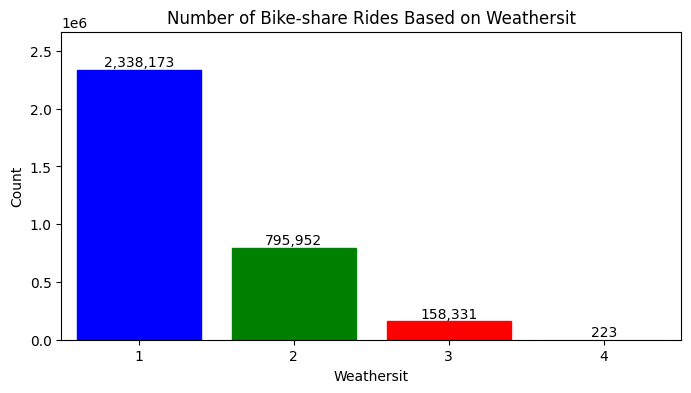

In [72]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='weathersit', y='cnt', data=weathersit)

# Menambahkan nilai di atas setiap batang
for bar in ax.patches:
    bar_value = int(bar.get_height())
    text = f'{bar_value:,}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=10)

# Bagian atas diberi ruang dengan margin
plt.margins(y=0.14)

# Menambahkan label dan judul
plt.xlabel('Weathersit')
plt.ylabel('Count')
plt.title('Number of Bike-share Rides Based on Weathersit')

# Mengganti warna barchart
ax.patches[0].set_color('blue')
ax.patches[1].set_color('green')
ax.patches[2].set_color('red')
ax.patches[3].set_color('yellow')

# Menampilkan plot
plt.show()

In [73]:
weathersit

,weathersit,cnt,weathersit_legend
0,1,2338173,"Clear, Few clouds, Partly cloudy, Partly cloudy"
1,2,795952,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
2,3,158331,"Light Snow, Light Rain + Thunderstorm + Scatte..."
3,4,223,Heavy Rain + Ice Pallets + Thunderstorm + Mist...


Keterangan Weathersit
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* Cuaca yang cerah dan sedikit berawan paling banyak bike-share rides
* Terlihat cuaca mempunyai pengaruh dalam hal jumlah bike-share rides

# Banyak nya penyewa

## berdasarkan hari

In [74]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [75]:
data2 = df[['weekday', 'casual', 'registered','cnt']]

In [76]:
data2 = data2.groupby('weekday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})
data2 = data2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

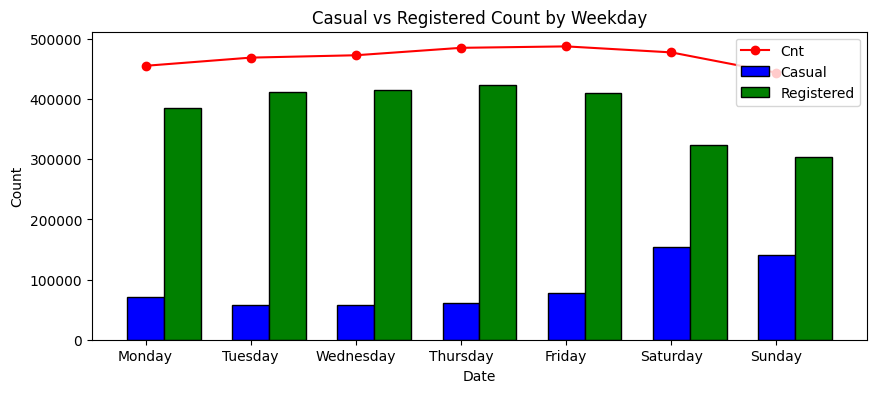

In [77]:
# Membuat satu kesatuan chart
fig, ax = plt.subplots(figsize=(10, 4))

# Bar chart untuk 'casual' dan 'registered'
bar_width = 0.35
bar_positions_casual = range(len(data2))
bar_positions_registered = [pos + bar_width for pos in bar_positions_casual]

ax.bar(bar_positions_casual, data2['casual'], bar_width, label='Casual', color='blue', edgecolor='black')
ax.bar(bar_positions_registered, data2['registered'], bar_width, label='Registered', color='green', edgecolor='black')

# Line plot untuk 'cnt'
ax.plot(data2.index, data2['cnt'], color='red', marker='o', label='Cnt')

# Menambahkan label dan judul pada sumbu x dan y
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.tick_params('y')

# Menambahkan judul
plt.title('Casual vs Registered Count by Weekday')

# Menambahkan legend
ax.legend(loc='upper right')

# Menampilkan plot
plt.show()

* Pada visualisasi terlihat pada saat waktu weekend pengguna dengan tipe casual terlihat ada peningkatan sedangkan untuk pengguna registered terlihat menurun.
* Pada hari Jumat adalah hari yang paling banyak pengguna bike-sharing lalu diikuti penurunan di waktu weekend.
* Untuk pengguna Registered paling banyak di hari Kamis

## berdasarkan jam

In [78]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [79]:
data4 = df[['hr' ,'casual',	'registered',	'cnt']].groupby('hr').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

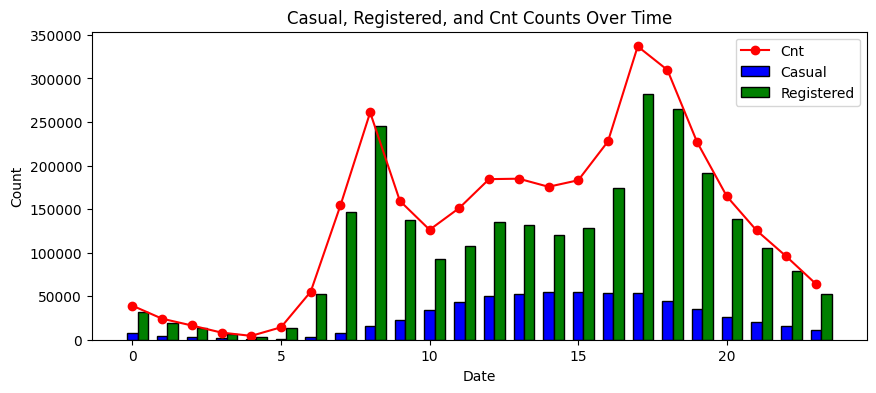

In [80]:
# Membuat satu kesatuan chart
fig, ax = plt.subplots(figsize=(10, 4))

# Bar chart untuk 'casual' dan 'registered'
bar_width = 0.35
bar_positions_casual = range(len(data4))
bar_positions_registered = [pos + bar_width for pos in bar_positions_casual]

ax.bar(bar_positions_casual, data4['casual'], bar_width, label='Casual', color='blue', edgecolor='black')
ax.bar(bar_positions_registered, data4['registered'], bar_width, label='Registered', color='green', edgecolor='black')

# Line plot untuk 'cnt'
ax.plot(data4.index, data4['cnt'], color='red', marker='o', label='Cnt')

# Menambahkan label dan judul pada sumbu x dan y
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.tick_params('y')

# Menambahkan judul
plt.title('Casual, Registered, and Cnt Counts Over Time')

# Menambahkan legend
ax.legend(loc='upper right')

# Menampilkan plot
plt.show()

* Bike-sharing paling banyak jumlahnya dengan akumulusi keseluruhan dalam 2 tahun di jam 17
* Meningkat jumlah bike-sharing dimulai pada pukul 5 dan dimulai lagi pada pukul 10

# 5. Korelasi jumlah sewa sepeda dengan temperature, kelembapan, dan kecepatan angin

In [81]:
df[['temp', 'atemp',	'hum',	'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


Jika dilihat dari tabel correlation di atas memang ada ada korelasi positif antara jumlah sewa sepeda dengan temperature, tetapi korelasi nya hanyalah sebesar 40%, jumlah korelasi yang terbilang cukup kecil. Begitu juga dengan kelembapan berkorelasi negatif dan cukup kecil.

In [83]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


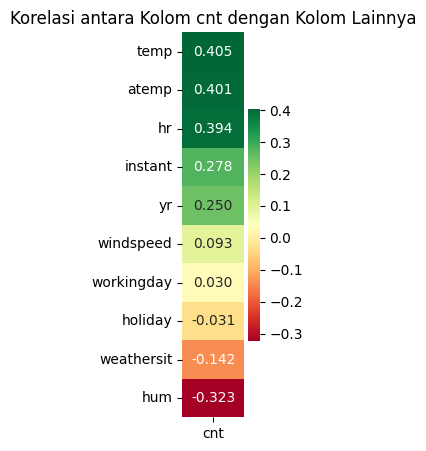

In [86]:
correlations = df.drop(columns=["casual", "registered", "cnt"])
correlations = correlations.select_dtypes(include='number').corrwith(df['cnt'])

# Membuat dataframe dari hasil korelasi
correlation_df = pd.DataFrame(correlations, columns=["cnt"]).sort_values(by='cnt', ascending=False)

# Membuat heatmap dari dataframe korelasi
plt.figure(figsize=(1, 5))
sns.heatmap(correlation_df, annot=True, cmap='RdYlGn', fmt=".3f")
plt.title("Korelasi antara Kolom cnt dengan Kolom Lainnya")
plt.show()

Terlihat juga untuk atribut-atribut yang lain juga memiliki korelasi yang terlibang cukup rendah, dan korelasi paling tinggi adalah antara cnt dengan temperature. Suhu yang paling berpengaruh pada jumlah bike-share ride di dataset ini.

# Model Machine Learning Untuk Jumlah Penyewa Sepeda

In [87]:
df_copy = df.copy()
df_copy.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [88]:
kolom = ['season',	'mnth',	'hr',	'weekday',	'weathersit',	'temp',	'atemp', 'hum', 'cnt']
df_model = df_copy[kolom]

In [89]:
mnth_encoder = {
    "January": 0,
    "February": 1,
    "March": 2,
    "April": 3,
    "May": 4,
    "June": 5,
    "July": 6,
    "August": 7,
    "September": 8,
    "October": 9,
    "November": 10,
    "December": 11
}

weekday_encoder = {
    "Sunday": 0,
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
}

In [90]:
df_model["mnth"] = df_model["mnth"].apply(lambda x: mnth_encoder[x])
df_model["weekday"] = df_model["weekday"].apply(lambda x: weekday_encoder[x])

<ipython-input-90-58379b7bb5a7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-58379b7bb5a7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_model.head()

,season,mnth,hr,weekday,weathersit,temp,atemp,hum,cnt
0,Springer,0,0,6,1,9.84,14.395,81.0,16
1,Springer,0,1,6,1,9.02,13.635,80.0,40
2,Springer,0,2,6,1,9.02,13.635,80.0,32
3,Springer,0,3,6,1,9.84,14.395,75.0,13
4,Springer,0,4,6,1,9.84,14.395,75.0,1


In [91]:
df_model = pd.get_dummies(df_model, prefix='season')
df_model = pd.get_dummies(df_model, columns=['weathersit'], prefix='weathersit')

In [ ]:
df_model.head()

,mnth,hr,weekday,temp,atemp,hum,cnt,season_Fall,season_Springer,season_Summer,season_Winter,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,6,9.84,14.395,81.0,16,0,1,0,0,1,0,0,0
1,0,1,6,9.02,13.635,80.0,40,0,1,0,0,1,0,0,0
2,0,2,6,9.02,13.635,80.0,32,0,1,0,0,1,0,0,0
3,0,3,6,9.84,14.395,75.0,13,0,1,0,0,1,0,0,0
4,0,4,6,9.84,14.395,75.0,1,0,1,0,0,1,0,0,0


In [ ]:
print("Rentang nilai setiap fitur:")
print(df_model[['temp',	'atemp',	'hum',	'cnt']].describe().loc[['min', 'max']])

Rentang nilai setiap fitur:
      temp  atemp    hum    cnt
min   0.82    0.0    0.0    1.0
max  41.00   50.0  100.0  977.0


In [94]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih fitur yang akan dinormalisasi
features_to_normalize = ['temp', 'atemp', 'hum']

# Normalisasi fitur yang dipilih
df_model[features_to_normalize] = scaler.fit_transform(df_model[features_to_normalize])

In [ ]:
df_model.head()

,mnth,hr,weekday,temp,atemp,hum,cnt,season_Fall,season_Springer,season_Summer,season_Winter,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,6,0.224490,0.2879,0.81,16,0,1,0,0,1,0,0,0
1,0,1,6,0.204082,0.2727,0.80,40,0,1,0,0,1,0,0,0
2,0,2,6,0.204082,0.2727,0.80,32,0,1,0,0,1,0,0,0
3,0,3,6,0.224490,0.2879,0.75,13,0,1,0,0,1,0,0,0
4,0,4,6,0.224490,0.2879,0.75,1,0,1,0,0,1,0,0,0


In [96]:
# memisahkan atribut fitur dan target
X = df_model.drop('cnt', axis=1)
y = df_model['cnt']

# membagi dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [98]:
from xgboost import XGBRegressor
best_params_ = {'colsample_bytree': 0.9,
                'gamma': 0.2,
                'learning_rate': 0.1,
                'max_depth': 7,
                'min_child_weight': 1,
                'n_estimators': 300,
                'subsample': 0.9}
model = XGBRegressor(**best_params_)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
import joblib
joblib.dump(model, "models.pkl")

['models.pkl']

In [100]:
model = joblib.load("models.pkl")

In [101]:
y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred).astype(int) # membulatkan hasil nya menjadi ke atas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung metrik evaluasi
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi untuk model XGBoost
print(f'Mean Absolute Error (MAE) XGBoost: {mae_xgb}')
print(f'Mean Squared Error (MSE) XGBoost: {mse_xgb}')
print(f'Root Mean Squared Error (RMSE) XGBoost: {rmse_xgb}')
print(f'R-squared (R2) XGBoost: {r2_xgb}')

Mean Absolute Error (MAE) XGBoost: 42.59474491752973
Mean Squared Error (MSE) XGBoost: 4197.971039509014
Root Mean Squared Error (RMSE) XGBoost: 64.79175132305821
R-squared (R2) XGBoost: 0.8729414345193309


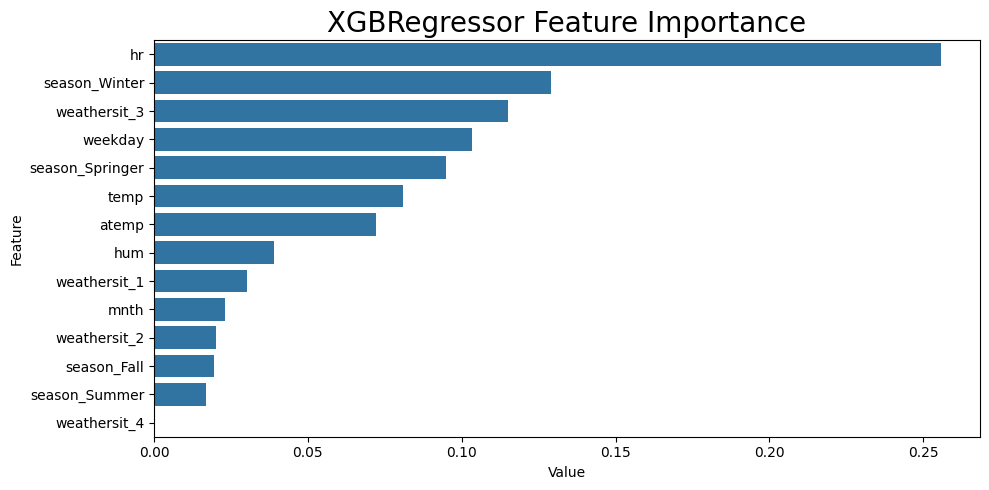

In [103]:
# sorted(zip(model.feature_importances_, X_train.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(label= 'XGBRegressor Feature Importance', size = 20)
plt.tight_layout()
plt.show()

In [104]:
y_predict = model.predict(X)
y_predict = np.ceil(y_predict).astype(int)

In [105]:
data = pd.DataFrame({'Actual': y, 'Predicted': y_predict})

In [106]:
data

,Actual,Predicted
0,16,35
1,40,40
2,32,32
3,13,14
4,1,3
...,...,...
17374,119,126
17375,89,101
17376,90,61
17377,61,48


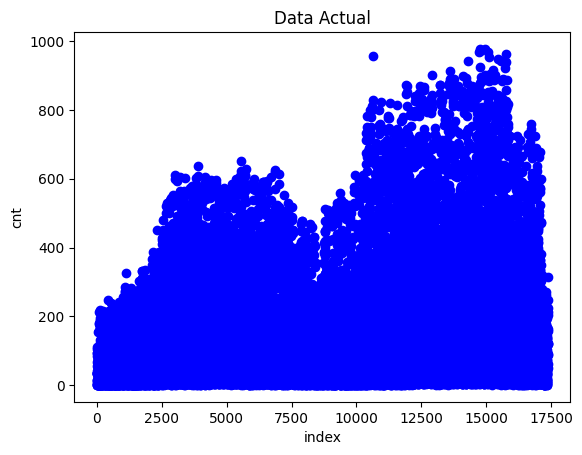

In [ ]:
plt.scatter(data.index, data['Actual'], label='Actual', marker='o', color='blue', alpha=1.0)
plt.xlabel('index')
plt.ylabel('cnt')
plt.title('Data Actual')
plt.show()

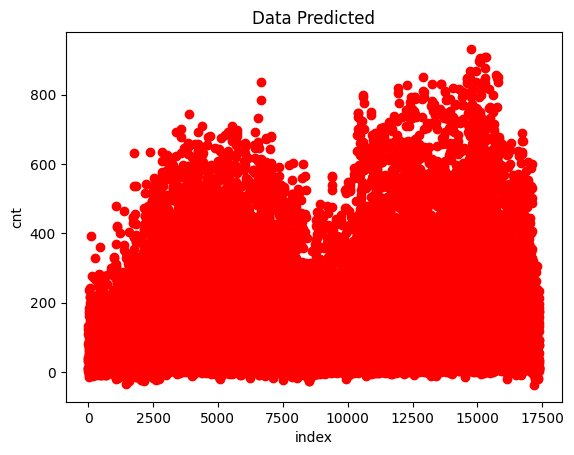

In [ ]:
plt.scatter(data.index, data['Predicted'], label='Predicted', marker='o', color='red', alpha=1.0)
plt.xlabel('index')
plt.ylabel('cnt')
plt.title('Data Predicted')
plt.show()